<div style="background-color: #fff1cd; background-image: url('../socnet.svg'); background-position: 1em 1em; background-repeat: no-repeat; background-size: 3em 3em; box-shadow: 0 0 0.25em 0; color: #403c33; font-weight: bold; min-height: 3em; padding: 1em 1em 1em 5em;">Como o nome sugere, você deve usar este notebook como um *caderno de anotações*. Use as células editáveis para tomar notas, principalmente quando os professores estiverem complementando o conteúdo com exposições orais ou exposições na lousa. Crie um *branch* pessoal do repositório, faça *commits* dessas notas e faça um *merge* sempre que o repositório for atualizado. Se alguma atualização modificar um notebook existente, essa modificação não envolverá as células editáveis, portanto não causará conflito.</div>

# Redes Sociais: Material do Encontro 1

Bem-vindo! Ao final desta atividade, você deverá ser capaz de:

* articular o conceito de *metodologia de pesquisa*;
* descrever as etapas do *método científico*;
* articular o conceito de *rede social*;
* articular o conceito de *Efeito Mateus.*

Esta atividade deve ser realizada em *dupla* ou *trio*, pois o processo de discussão é importante.

In [3]:
# Configura caminho dos módulos.
import sys
sys.path.append('..')

# Importa módulos padrão.
from statistics import mean, stdev

# Importa módulos não-padrão.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, linregress

# Importa módulos próprios.
import socnet as sn

# Ativa exibição de gráficos no notebook.
%matplotlib inline

### Introdução: ciência como mercado de ideias

* "O Sol gira em torno da Terra."
* "Objetos mais pesados caem mais rapidamente que objetos mais leves."
* "A Terra tem 5 mil anos de idade."

Essas afirmações, entre muitas outras, foram consideradas verdadeiras por centenas de anos. Eram derivadas de observações a olho nu (por exemplo, a rotação do Sol era uma explicação para a ocorrência de nascente e poente), pressupostos religiosos (por exemplo, a idade da Terra era citada a partir das escrituras) ou ambos.

Com a crescente separação entre religião, arte e ciência, a partir da [Renascença Italiana](https://en.wikipedia.org/wiki/Italian_Renaissance), essas ideias começaram a ser desafiadas. A passagem abaixo, sobre o início da carreira científica de [Galileo Galilei](https://en.wikipedia.org/wiki/Galileo_Galilei), ilustra essa mudança de paradigma que iria inaugurar a ciência moderna:

> *Galileo's first trial of strength with the university professors was connected with his researches into the laws of motion as illustrated by falling bodies. It was an accepted axiom of Aristotle that the speed of falling bodies was regulated by their respective weights: thus, a stone weighing two pounds would fall twice as quick as one weighing only a single pound and so on. No one seems to have questioned the correctness of this rule, until Galileo gave it his denial. He declared that weight had nothing to do with the matter, and that two bodies of unequal weight would reach the ground at the same moment. As Galileo’s statement was flouted by the body of professors, he determined to put it to a public test. So he invited the whole University to witness the experiment which he was about to perform from the leaning tower. On the morning of the day fixed, Galileo, in the presence of the assesmbled University and townsfolk, mounted to the top of the tower, carrying with him two balls, one weighing one hundred pounds and the other weighing one pound. Balancing the balls carefully on the edge of the parapet, he rolled them over together; they were seen to fall evenly, and the next instant, with a loud clang, they struck the ground together. The old tradition was false, and modern science, in the person of the young discoverer, had vindicated her position.* [1, 2]

O procedimento de Galileo era revolucionário para a época, não apenas por desafiar ideias consolidadas e consagradas, mas também por possibilitar que novos conhecimentos fossem construídos por indivíduos fora das estruturas hierárquicas tradicionais associadas, como por exemplo a Igreja e a Universidade Escolástica.

Poderíamos, a partir de Galileo e da [Revolução Científica](https://en.wikipedia.org/wiki/Scientific_Revolution), imaginar a construção de conhecimento como um "mercado". Assim como Galileo, qualquer pessoa pode submeter suas ideias para serem testadas pela comunidade científica. Após serem criteriosamente verificadas pelos pares, as ideias aceitas passam a ser adotadas pela comunidade e as ideias rejeitadas são descartadas do corpo de conhecimento aprovado pela Ciência.

A visão de que a Ciência possa ser feita de forma aberta, pública e independente de relações hierárquicas, desde que admitindo teste criterioso, impulsionou vários pensadores a associá-la aos valores de Liberdade e Democracia. Por exemplo: John Stuart Mill, em seu livro *On Liberty*, afirma que esse “mercado” é crucial para a emersão de canais de comunicação na sociedade onde fatos possam ser ratificados e, com isso, permitir que cidadãos possam monitorar melhor seus governos.

O pressuposto central desse conceito de “mercado de ideias” livre e aberto é que a comunidade científica seja efetiva em testar a qualidade das ideias em circulação. Como isso ocorre? Quando um cientista concebe uma nova ideia, submete um artigo para publicação em uma revista acadêmica. A partir dessa submissão, pareceristas são encarregados de julgar se essa ideia, assim como as evidências e os procedimentos adotados, são consistentes e coerentes. Se esses pressupostos forem atendidos, o artigo é aceito para publicação e a nova ideia é adotada. A adoção de novas ideias pode ser confirmada por citações do artigo em outros publicados posteriormente.

Faz sentido, portanto, esperar que a quantidade de citações recebidas por uma publicação seja proporcional à sua qualidade intrínseca. Por exemplo: se a distribuição de qualidade intrínseca for normal...

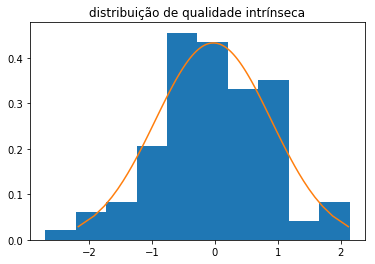

In [4]:
'''
Durante o encontro, você pode pular este código
sem precisar entender, mas reserve um tempo para
ler sozinho e com calma depois, como exercício.
'''

# Carrega uma rede de artigos e citações.
g = sn.load_graph('entrada.gml')

# Plota o histograma de qualidade.
qualities = [g.nodes[n]['quality'] for n in g.nodes]
hist = plt.hist(qualities, density=True)

# Plota a curva da normal.
dist = norm(mean(qualities), stdev(qualities))
xdata = [dist.ppf(i / 100) for i in range(1, 100)]
ydata = [dist.pdf(x) for x in xdata]
plt.plot(xdata, ydata)

# Exibe o gráfico.
plt.title('distribuição de qualidade intrínseca')
plt.show()

...esperamos que a distribuição de quantidade de citações também seja normal. No entanto, isso não ocorre em certas comunidades científicas.

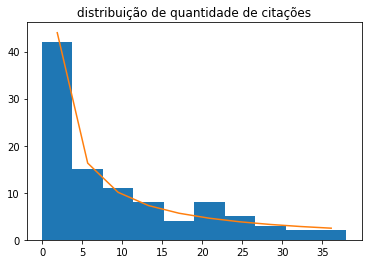

In [5]:
'''
Durante o encontro, você pode pular este código
sem precisar entender, mas reserve um tempo para
ler sozinho e com calma depois, como exercício.
'''

# Plota o histograma de citações.
hist = plt.hist([g.in_degree(n) for n in g.nodes])
xdata = [(l + r) / 2 for l, r in zip(hist[1][:-1], hist[1][1:])]
ydata = [h + 1 for h in hist[0]]

# Calcula uma regressão linear sobre os logaritmos dos dados.
reg = linregress(np.log(xdata), np.log(ydata))

# Plota uma exponencial da curva de regressão.
plt.plot(xdata, [x ** reg[0] * np.exp(reg[1]) - 1 for x in xdata])

# Exibe o gráfico.
plt.title('distribuição de quantidade de citações')
plt.show()

Essa distribuição é conhecida como *power law*, por ser proporcional a uma potência.

Disse segue uma **pergunta de pesquisa:** por que em certas comunidades científicas a distribuição de citações segue uma *power law*?

Descrevemos a seguir um protocolo para estruturar a investigação desse fenômeno e algumas alternativas para discussão.

### Etapa 1: traduzir um contexto para um modelo com mecanismos sociológicos

*A partir do que observamos e entendemos do contexto, do que conhecemos em relação às teorias relacionadas e da nossa imaginação, propomos uma explicação de como o fenômeno surge, baseada em mecanismos sociológicos que cobrem os elementos observados.*

Considere as duas alternativas abaixo como possibilidades de entregável dessa etapa.

**Alternativa A:** O meio científico é, sobretudo, uma comunidade cujos indivíduos possuem limitações e interesses. Assim, tudo aquilo que ocorre na sociedade como um todo pode ocorrer nesse meio. É importante considerar, portanto, todos os fatores que geram desigualdade, seja ela acadêmica ou não. Alguns mecanismos óbvios: sexismo, racismo, preconceito contra pesquisadores idosos, preconceito contra pesquisadores jovens, entre outros. Para ilustrar o funcionamento desses mecanismos, podemos propor uma explicação de como o sexismo pode causar assimetria de popularidade. Sabemos que as pessoas, tanto homens quanto mulheres, consideram o gênero masculino mais competente que o feminino: as mulheres sofrem um “desconto”, tendo suas contribuições vistas como menos importantes. Se uma comunidade científica atribui menor valor a essas contribuições, é esperado que os artigos escritos por homens acumulem maior popularidade, independentemente da qualidade intrínseca deles.

**Alternativa B:** Devemos pensar que os indivíduos de uma comunidade científica possuem capacidade variável de apreciação da qualidade intrínseca dos artigos submetidos. Independentemente de qualquer outra característica desses cientistas, podemos presumir que eles, em geral, têm uma necessidade alta de sentir que pertencem a debates relevantes e importantes. Dessa forma, quando se deparam com um artigo que já foi citado por outros cientistas, se sentem mais confortáveis em citar esse artigo do que outro ainda não citado. Supondo essa ideia como verdadeira, artigos que inicialmente ganharam citações por serem apenas marginalmente melhores, com o passar do tempo, acabam acumulando uma quantidade desproporcional de citações em relação a sua qualidade intrínseca.

Qual dessas alternativas você considera melhor? Por quê?

**Anotações:**
 - Mecanismo é uma explicação. Uma variável é influenciada por algo, que desencadeia um resultado.
 - Ser uma mulher é uma condição suficiente, mas não necessária. Não explica a formação da cauda da normal. Se pegarmos uma pessoa da cauda, há grandes chances de ser uma mulher, mas pode ser um homem também.

### Etapa 2: traduzir mecanismos sociológicos para hipóteses testáveis com variáveis apropriadas

*A partir dos mecanismos propostos, especificamos hipóteses que claramente relacionam grandezas.*

Considere as duas alternativas abaixo como possibilidades de entregável dessa etapa.

**Alternativa A:** Dado o mecanismo de "citação sexista", identificado na primeira alternativa da etapa anterior, especificamos a seguinte hipótese: "ao final de uma simulação desse mecanismo, a distribuição de citações será estatisticamente semelhante a uma *power law*."

**Alternativa B:** Dado o mecanismo de "citação cumulativa", identificado na segunda alternativa da etapa anterior, especificamos as seguinte hipótese: “se existe uma diferença de qualidade entre dois artigos, o melhor será muito mais citado mesmo que essa diferença seja pequena."

Qual dessas alternativas você considera melhor? Por quê?

### Etapa 3: operacionalizar e testar hipóteses

*A partir das hipóteses especificadas, implementamos e executamos mensurações.*

Considere a hipótese "ao final de uma simulação do mecanismo de citação cumulativa, a distribuição de citações será estatisticamente semelhante a uma *power law*". Note que essa hipótese não foi especificada em nenhuma das duas alternativas da etapa anterior.

Suponha que realizamos uma simulação na qual um conjunto de 100 artigos começa com uma distribuição normal de qualidade intrínseca e nenhuma citação. Em cada iteração dessa simulação, selecionamos um artigo que não cita nenhum e escolhemos 10 outros para ele citar. A probabilidade de um artigo ser selecionado para ser citado é proporcional a uma soma ponderada de sua qualidade intrínseca com a quantidade de citações que já possui. Naturalmente, a simulação termina quando todo artigo citar algum.

Imaginando que o código e os resultados estariam disponíveis, considere as duas alternativas abaixo como possibilidades de entregável dessa etapa.

**Alternativa A:** Infográfico dos artigos, indicando através de um mapa de calor a quantidade relativa de citações que cada um recebe. Constatação, a partir desse infográfico, de que a quantidade de artigos pouco citados é alta.

**Alternativa B:** Histograma da quantidade de citações e teste que rejeita a hipótese desse histograma ser diferente de uma *power law*.

Qual dessas alternativas você considera melhor? Por quê?

### Etapa 4: interpretar resultados de uma operacionalização e teste de hipótese

*A partir das mensurações implementadas e executadas, interpretamos as informações que foram obtidas.*

Considere as duas alternativas abaixo como possibilidades de entregável dessa etapa.

**Alternativa A:** Os resultados da simulação indicam que a distribuição de citações é estatisticamente semelhante a uma *power law*. Isso sugere que a qualidade é irrelevante.

**Alternativa B:** Os resultados da simulação indicam que a distribuição de citações é estatisticamente semelhante a uma *power law*. Entretanto, essa semelhança ocorreu apenas nos casos em que o peso da popularidade era superior a 90%. Em outros casos, obteve-se uma distribuição normal.

Qual dessas alternativas você considera melhor? Por quê?

### Etapa 5: identificar implicações, extrapolar e generalizar resultados e reinterpretar contextos

*Quando interpretamos os resultados na etapa anterior, ainda estamos relatando os fatos usando jargões e linguagem técnica, impedindo portanto a compreensão pelo público em geral. Além disso, ainda não podemos saber com certeza se o que observamos faz sentido em relação ao contexto e/ou da teoria na qual baseamos o início do estudo.*

*Nesta etapa, ocorre um retorno ao contexto, à teoria e, ao utilizar uma linguagem acessível, ao grande público. Sugerimos o que aprendemos sobre o contexto e o que acrescentamos à teoria. Em muitos casos, os resultados obtidos não correspondem ou não reproduzem de forma fidedigna o contexto original ou não permitem generalização (explicação de outros contextos). Essa distância entre resultados, contextos e teorias provoca uma discussão que pode levar a uma revisão da teoria proposta ou identificação de limites da pesquisa que poderão ser incorporados em estudos futuros.*

Considere as duas alternativas abaixo como possibilidades de entregável dessa etapa.

**Alternativa B:** A rejeição da hipótese nula sugere que o mecanismo de "citação cumulativa" realmente ocorre em certas comunidades científicas. Entretanto, ele não explica outros contextos que possuem distribuições diferentes de *power-law*. Isso sugere que existem mecanismos suplementares, capazes de mitigar o chamado [Efeito Mateus](https://en.wikipedia.org/wiki/Matthew_effect).

**Alternativa A:** Como a hipótese nula foi rejeitada, a hipótese foi validada e a teoria foi corroborada.

Qual dessas alternativas você considera melhor? Por quê?

### Reflexão 1

Uma pesquisa pode ser considerada boa quando os resultados não corroboram as hipóteses especificadas?

### Reflexão 2

Uma pesquisa pode ser considerada boa quando a comunidade não possui acesso a seus entregáveis?

### Referências

1. F. J. Rowbotham. *Story Lives of Men of Science.* Wells Gardner, Darton and Company, 1918.
2. A. F. Chalmers. *What is This Thing Called Science?* Hackett, 2013.

### Observações